# 発表資料用データ作成

- 内需と外需の変化
    -  すでに内需株が上がっていることを示す 
-  為替との相関
-  

### 内需と外需の変化

In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd 
import mysql.connector

import db_info

In [2]:
con_fund = mysql.connector.connect(user=db_info.user, password=db_info.passwd,
                                  host=db_info.host, database=db_info.db_fund, charset='utf8')

### sector分類
[関連株とセクター株分類](http://www.netgokui.com/kabuhajimete/sectorkanren.html)

#### 外需株の対象sector

- 卸売
- 機械
- 電気機器
- 精密機器
- 輸送用機器

#### 内需株の対象のsector
- 情報通信
- 小売
- 不動産
- 建設
- サービス
- 倉庫・運輸
- 電気・ガス


In [3]:
sql = """
         SELECT code, name FROM stock_info 
         WHERE (`sector`= '卸売' OR '機械' OR '電気機器' OR '精密機器' OR '輸送用機器') 
         AND listed_date < '2007-08-21';
         
         """

df_out = pd.read_sql(sql, con_fund)

In [4]:
df_out.head()

,code,name
0,1352,ホウスイ
1,2654,アスモ
2,2667,イメージワン
3,2668,タビオ
4,2676,高千穂交易


In [5]:
df_out.shape

(290, 2)

In [6]:
sql = """
         SELECT code, name FROM stock_info 
         WHERE (`sector`= '情報通信' OR '小売' OR '不動産' OR '建設' OR 'サービス' OR '倉庫・運輸' OR '電気・ガス') 
         AND listed_date < '2007-08-21';
         """

df_in = pd.read_sql(sql, con_fund)

In [7]:
df_in.head()

,code,name
0,1973,NECネッツエスアイ
1,2138,クルーズ
2,2303,ドーン
3,2307,クロスキャット
4,2315,SJI


In [8]:
df_in.shape

(250, 2)

In [9]:
con_fund.close()

In [10]:
con_price = mysql.connector.connect(user=db_info.user, password=db_info.passwd,
                                  host=db_info.host, database=db_info.db_price, charset='utf8')

In [11]:
# 外需株データを取得
df_outs_list = [] 
df_outs_deviate_list = []
for code in df_out["code"]:
    table_name = str(code) + ".T"
    sql = """
             SELECT date, adjusted_closing_price, deviationrate_75 FROM `{table_name}` WHERE date >'2007-08-21';
             """.format(table_name=table_name)
    df = pd.read_sql(sql, con_price, index_col="date")
    df.columns = [str(code), str(code) + "_dev_75"]
    df_outs_list.append(pd.DataFrame(df[str(code)]))
    df_outs_deviate_list.append(pd.DataFrame(df[str(code) + "_dev_75"]))

df_outs = pd.concat(df_outs_list, axis=1).fillna(method="bfill")
df_outs_dev = pd.concat(df_outs_deviate_list, axis=1).fillna(method="bfill")

In [12]:
# 10年分の株価と75日乖離率
df_outs.head()

,1352,2654,2667,2668,2676,2689,2692,2693,2700,2703,...,9964,9967,9972,9982,9986,9987,9991,9992,9995,9996
2007-08-22,160.0,100.0,402.0,1580.0,1555.0,1403.0,3450.0,395.0,322.0,510.0,...,1216.0,294.0,398.0,411.0,1053.0,3040.91,619.0,262.0,383.0,1070.0
2007-08-23,160.0,100.0,415.0,1680.0,1585.0,1403.0,3500.0,397.0,326.0,511.0,...,1290.0,306.0,404.0,411.0,1040.0,3040.91,646.0,269.0,412.5,1090.0
2007-08-24,157.0,94.0,422.0,1770.0,1563.0,1413.0,3540.0,394.0,326.0,522.0,...,1231.0,306.0,407.0,411.0,1030.0,3040.91,637.0,270.0,414.5,1090.0
2007-08-27,160.0,94.0,415.5,1789.0,1579.0,1458.0,3550.0,398.0,334.0,536.0,...,1185.0,306.0,406.0,411.0,1030.0,3040.91,639.0,265.0,414.5,1125.0
2007-08-28,160.0,94.0,430.0,1850.0,1577.0,1490.0,3570.0,393.0,340.0,570.0,...,1170.0,306.0,436.0,411.0,1025.0,3040.91,638.0,267.0,412.5,1085.0


In [13]:
df_outs_dev.head()

,1352_dev_75,2654_dev_75,2667_dev_75,2668_dev_75,2676_dev_75,2689_dev_75,2692_dev_75,2693_dev_75,2700_dev_75,2703_dev_75,...,9964_dev_75,9967_dev_75,9972_dev_75,9982_dev_75,9986_dev_75,9987_dev_75,9991_dev_75,9992_dev_75,9995_dev_75,9996_dev_75
2007-08-22,0.073826,0.043841,-0.005197,0.037562,0.012502,-0.002276,-0.009759,-0.005539,0.003741,-0.147157,...,-0.026577,-0.054054,-0.001505,None,-0.008848,None,-0.009283,-0.031065,-0.008286,-0.009993
2007-08-23,0.065246,0.028807,0.020157,0.081917,0.027353,-0.002276,0.008065,0.001009,0.012422,-0.089127,...,0.027725,-0.009067,0.019173,None,-0.013657,None,0.030303,0.002983,0.055797,0.013199
2007-08-24,0.023468,-0.028926,0.027264,0.091111,0.006698,0.012903,0.017241,-0.005553,0.012422,-0.015466,...,-0.016302,-0.009067,0.022099,None,-0.017738,None,0.010470,0.014275,0.043818,0.008512
2007-08-27,0.017812,-0.030928,0.006297,0.069976,0.009462,0.032139,0.014866,0.003530,0.028325,0.026427,...,-0.046201,-0.009067,0.009950,None,-0.012085,None,0.007251,0.003028,0.043818,0.032300
2007-08-28,0.003764,-0.024896,0.031422,0.067020,0.003308,0.039922,0.013629,-0.006070,0.034693,0.075878,...,-0.039724,0.000000,0.062896,None,-0.010236,None,0.003460,0.001500,0.028422,-0.006410


In [14]:
# 内需株データを取得
df_ins_list = [] 
df_ins_deviate_list = []
for code in df_in["code"]:
    table_name = str(code) + ".T"
    sql = """
             SELECT date, adjusted_closing_price, deviationrate_75 FROM `{table_name}` WHERE date >'2007-08-21';
             """.format(table_name=table_name)
    df = pd.read_sql(sql, con_price, index_col="date")
    df.columns = [str(code), str(code) + "_dev_75"]
    df_ins_list.append(pd.DataFrame(df[str(code)]))
    df_ins_deviate_list.append(pd.DataFrame(df[str(code) + "_dev_75"]))

df_ins = pd.concat(df_ins_list, axis=1).fillna(method="bfill")
df_ins_dev = pd.concat(df_ins_deviate_list, axis=1).fillna(method="bfill")

In [15]:
# 10年分の株価と75日乖離率
df_ins.head()

,1973,2138,2303,2307,2315,2321,2323,2326,2327,2329,...,9749,9753,9758,9759,9766,9790,9799,9889,9928,9984
2007-08-22,1097.0,372.5,170.0,236.0,670.0,758.0,1260.0,440.0,1525.0,1097.0,...,2305.0,345.0,247.0,1611.82,2710.0,398.0,1165.0,933.0,304.0,2260.0
2007-08-23,1172.0,422.5,182.5,236.0,679.0,805.0,1400.0,440.0,1560.0,1102.0,...,2395.0,348.0,250.0,1673.64,2745.0,398.0,1141.0,960.0,303.0,2290.0
2007-08-24,1183.0,435.0,190.0,238.0,665.0,797.0,1420.0,440.0,1555.0,1080.0,...,2355.0,353.0,260.0,1700.00,2720.0,401.0,1141.0,1012.0,308.0,2270.0
2007-08-27,1186.0,415.0,205.0,257.0,655.0,792.0,1380.0,440.0,1600.0,1059.0,...,2365.0,353.0,261.0,1728.18,2750.0,392.5,1150.0,1013.0,301.0,2270.0
2007-08-28,1149.0,410.0,225.0,264.0,661.0,777.0,1410.0,440.0,1570.0,1059.0,...,2350.0,343.0,261.0,1722.73,2735.0,393.5,1150.0,1007.0,300.0,2310.0


In [16]:
df_ins_dev.head()

,1973_dev_75,2138_dev_75,2303_dev_75,2307_dev_75,2315_dev_75,2321_dev_75,2323_dev_75,2326_dev_75,2327_dev_75,2329_dev_75,...,9749_dev_75,9753_dev_75,9758_dev_75,9759_dev_75,9766_dev_75,9790_dev_75,9799_dev_75,9889_dev_75,9928_dev_75,9984_dev_75
2007-08-22,-0.009749,0.023352,-0.026067,-0.008403,0.002094,0.003442,0.011236,0.0,-0.003268,-0.016143,...,0.002610,-0.020443,-0.065102,0.043801,0.030418,0.014271,0.011812,0.003442,0.015364,0.003998
2007-08-23,0.055666,0.132708,0.042559,-0.008403,0.016163,0.067356,0.105845,0.0,0.014964,-0.001269,...,0.034557,-0.009112,-0.038462,0.059507,0.035458,0.017903,-0.006444,0.032480,0.012024,0.019137
2007-08-24,0.043578,0.113956,0.065620,0.005068,-0.006276,0.033454,0.080670,0.0,0.007124,-0.012978,...,0.009863,0.005125,0.008534,0.054115,0.015683,0.010585,-0.010064,0.063025,0.016502,-0.001320
2007-08-27,0.027018,0.034913,0.112619,0.069942,-0.020634,0.013047,0.028316,0.0,0.032258,-0.026654,...,0.009390,0.009148,0.017147,0.043588,0.015885,-0.012082,0.001393,0.043254,-0.007256,-0.003074
2007-08-28,-0.007258,-0.002433,0.156812,0.073171,-0.007508,-0.011199,0.026201,0.0,0.005122,-0.018899,...,-0.001699,-0.015499,0.020328,0.021013,0.001098,-0.007816,0.001393,0.022335,-0.010554,0.013158


In [17]:
out_average_price = pd.DataFrame(df_outs.mean(axis=1))
in_average_price = pd.DataFrame(df_ins.mean(axis=1))
price = pd.concat([out_average_price, in_average_price], axis=1)
price.columns = ["overseas demand related index", "domestic demand related index"]

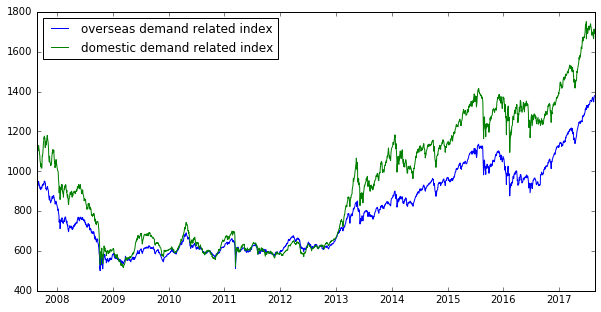

In [18]:
price.plot(figsize=(10,5))
# plt.savefig("image2.png")

東京オリンピックが決まったのが2013年9月8日
http://www.nikkei.com/article/DGXNASDG07047_Y3A900C1000000/

###### 考察

- リーマンショック後は外需と内需が拮抗している
- 2013年アベノミクスで上昇
- やはり大きなさが出たのは東京オリンピックか(すでに織り込み済みという説はあっているかも)

###### 指数(全体平均からの乖離を見てみる)

In [19]:
average_price = (out_average_price*250 + in_average_price*290)/(250+290)
average_price.columns = ["average"]

In [20]:
diff_out_average_price = price["overseas demand related index"] - average_price["average"]
diff_in_average_price = price["domestic demand related index"] - average_price["average"]
diff_price = pd.concat([diff_out_average_price, diff_in_average_price], axis=1)
diff_price.columns = ["deviation of overseas demand related index", "deviation of domestic demand related index"]

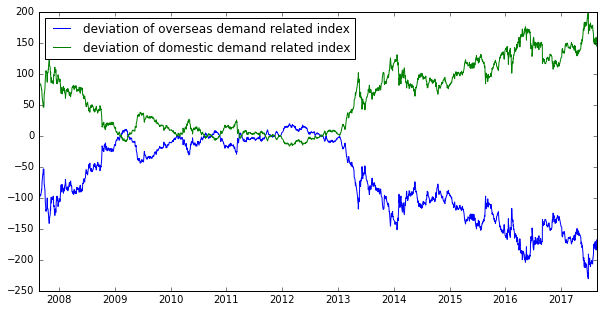

In [21]:
diff_price.plot(figsize=(10,5))

In [22]:
table_name = "USDJPY"
sql = """
         SELECT date, closing_price FROM `{table_name}` WHERE date >'2007-08-21';
         """.format(table_name=table_name)
df_usdjpy = pd.read_sql(sql, con_price, index_col="date")
df_usdjpy.columns = ["USDJPY"]

###### ドル円 

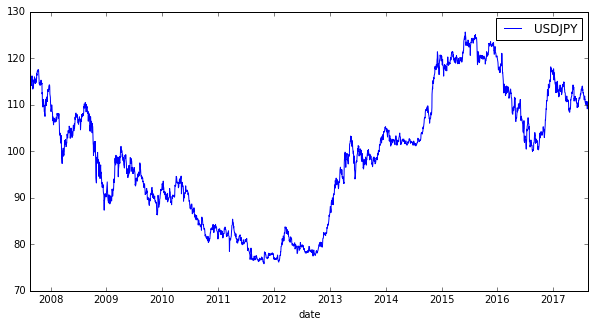

In [23]:
df_usdjpy.plot(figsize=(10,5))

###### ドル円と内需と外需の乖離

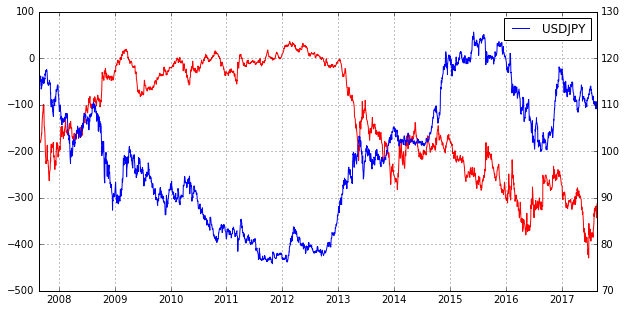

In [24]:
fig, ax1 = plt.subplots()
diff_average = price["overseas demand related index"] - price["domestic demand related index"]
diff_average.columns = ["diff between overseas and domestic"]
diff_average.plot(ax=ax1, figsize=(10, 5), color="red",grid=True,)

ax2 = ax1.twinx()
df_usdjpy.plot(ax=ax2, figsize=(10,5))